# Data Job Salaries


### About The Dataset
###### 1. work_year: The year the salary was paid.
###### 2. experience_level: The experience level in the job during the year
###### 3. employment_type: The type of employment for the role
###### 4. job_title: The role worked in during the year.
###### 5. salary: The total gross salary amount paid.
###### 6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
###### 7. salaryinusd: The salary in USD
###### 8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
###### 9. remote_ratio: The overall amount of work done remotely
###### 10. company_location: The country of the employer's main office or contracting branch
###### 11. company_size: The median number of people that worked for the company during the year


### Import Libraries

In [28]:
# data
import pandas as pd
import numpy as np
import country_converter as coco

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud

# nltk
import nltk

# styling
%matplotlib inline
sns.set_theme(style='dark')
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

# read dataframe
df = pd.read_csv('ds_salaries\ds_salaries.csv')

In [7]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Initial Cleaning

In [8]:
# removing unnecessary columns
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis=1,inplace=True)

In [10]:
df.shape

(607, 9)

**We now have nine columns and 607 rows**

Text(0.5, 1.0, 'Missing Values')

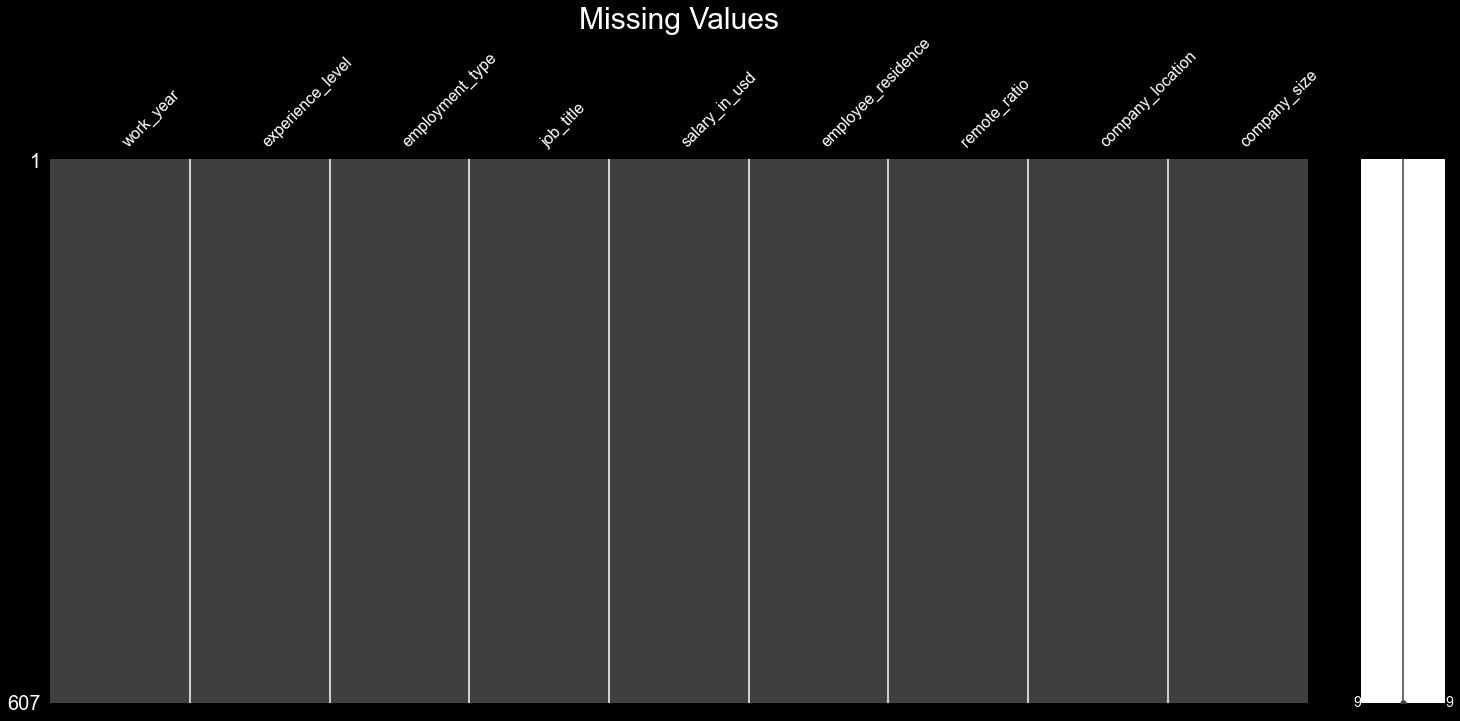

In [13]:
msno.matrix(df)
plt.title('Missing Values',fontsize=30)

**There are no missing values in the dataset**

# Univariate Analysis
**The dataframe has 3 numeric columns(work_year, salary_in_usd, remote_ratio) and 6 categorical columns(experience_level, employment_type, job_title, employee_residence, company_size)**

### Experience Level

In [263]:
# 4 values in column
# EN: entry-level/junior
# MI: mid-level/intermediate
# SE: senior-level/expert
# EX: executive-level/director

df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()

fig = px.treemap(ex_level,
                 path=[ex_level.index],
                 values=ex_level.values,
                 title='Experience Level',
                 color=ex_level.index,
                 color_discrete_sequence=px.colors.sequential.Cividis,
                 template='plotly_dark',
                 width=1000,height=500)

percents = np.round((100*ex_level.values/sum(ex_level.values)).tolist(),2)
fig.data[0].customdata = [35.09,46.13,4.28,14.5]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(font=dict(size=20,family='Franklin Gothic'))

fig.show()

C:\Users\jmyau\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



**From the above treemap we can see that senior-level/expert accounts for the majority at 46.1%, then mid-level/intermediate at 35.1%, entry-level/junior at 14.5% and finally there's only around 4.3% at the executive-level/director.**

### Job Titles

In [18]:
# amount of job titles in dataset
df['job_title'].value_counts().size

50

In [267]:
top10 = df['job_title'].value_counts()[:10]
fig = px.bar(y=top10.values,
             x=top10.index,
             color=top10.index,
             color_discrete_sequence=px.colors.sequential.amp,
             text=top10.values,
             title='Top 10 Job Titles',
             template='plotly_dark')
fig.update_layout(
    xaxis_title='Title',
    yaxis_title='Count',
    title_x=0.5,
    font=dict(size=17,family='Franklin Gothic'))

**Data Scientist, Data Engineer, and Data Analyst are the top 3 most common titles however the others could also fall under the same title.**

### Employment Type

In [268]:
# 4 employment types
# PT: part-time
# FT: full-time
# CT: contract
# FL: freelance

type_group = df['employment_type'].value_counts()
e_type = ['full-time','part-time','contract','freelance']

fig = px.bar(x=e_type,
             y=type_group.values,
             color=type_group.index,
             color_discrete_sequence=px.colors.sequential.amp,
             template='plotly_dark',
             text=type_group.values,title='Employment Type Distribution')
fig.update_layout(
    xaxis_title='Type',
    yaxis_title='Count',
    title_x=0.5,
    font=dict(size=17,family='Franklin Gothic'))
fig.update_traces(width=0.5)

fig.show()

**Most employees are full-time**

### Employee Residence and Company Location

In [33]:
# convert country into choropleth readable type
converted_country = coco.convert(names=df['employee_residence'], to='ISO3')
df['employee_residence'] = converted_country

In [270]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    template='plotly_dark',
                    title='Employee Location Distribution Map')
fig.update_layout(title_x=0.5,
                  font=dict(size=17,family='Franklin Gothic'))

fig.show()

In [47]:
top10_loc = residence[:10]
fig = px.bar(y=top10_loc.values,
             x=top10_loc.index,
             color=top10_loc.index,
             color_discrete_sequence=px.colors.sequential.deep,
             text=top10_loc.values,
             title='Top 10 Employee Locations',
             template='plotly_dark')
fig.update_layout(
    xaxis_title='Locations',
    yaxis_title='Count',
    title_x=0.5,
    font=dict(size=17,family='Franklin Gothic'))

fig.show()

**Most employees are based in the US**

In [220]:
converted_country = coco.convert(names=df['company_location'],to='ISO3')
df['company_location'] = converted_country
c_loc = df['company_location'].value_counts()
top10_c_loc = c_loc[:10]
fig = go.Figure(data=[
    go.Bar(name='Employee Location',
          x=top10_loc.index,
          y=top10_loc.values,
          text=top10_loc.values,
          marker_color='firebrick'),
    go.Bar(name='Company Location',
          x=top10_c_loc.index,
          y=top10_c_loc.values,
          text=top10_c_loc.values,
          marker_color='cornsilk')
])
fig.update_layout(barmode='group',
                  xaxis_tickangle=-45,
                  title='Employee Location vs Company Location',
                  title_x=0.5,
                  template='plotly_dark',
                  font=dict(size=17,family='Franklin Gothic'))
fig.show()

**The US, UK, Canada, and Germany have a higher count of company locations than employee locations.**

### Company Size

In [83]:
group_size = df['company_size'].value_counts()

fig = px.pie(values=group_size.values,
             names=group_size.index,
             color_discrete_sequence=px.colors.sequential.Mint,
             title='Company Size Distribution',
             template='plotly_dark')
fig.update_layout(title_x=0.5,
                  font=dict(size=17,family='Franklin Gothic'))
fig.update_traces(textinfo='label+percent+value',
                  textfont_size=17,
                  marker=dict(line=dict(color='#100000',width=0.2)))

fig.data[0].marker.line.width=2
fig.data[0].marker.line.color='gray'
fig.show()

**Medium sized companies make up more than half the dataset**

# Work Year Analysis

In [272]:
wkyear = df['work_year'].value_counts()

fig = px.pie(values=wkyear.values,
             names=wkyear.index,
             color_discrete_sequence=px.colors.sequential.deep,
             title='Work Year Distribution',
             template='plotly_dark')

fig.update_layout(title_x=0.5,
                  font=dict(size=17,family='Franklin Gothic'))

fig.update_traces(textinfo='label+percent+value',
                  textfont_size=17,
                  marker=dict(line=dict(color='#100000',width=0.2)))

fig.data[0].marker.line.width=2
fig.data[0].marker.line.color='gray'
fig.show()

**The year 2022 accounts for more than half the dataset.**

### Salary

In [144]:
hist_data = [df['salary_in_usd']]
group_labels = ['salary_in_usd']

fig1 = px.box(y=df['salary_in_usd'],
              template='plotly_dark',
              title='Salary in USD BoxPlot')
fig1.update_layout(title_x=0.5,
                   font=dict(size=17,family='Franklin Gothic'))

fig2 = ff.create_distplot(hist_data,group_labels,show_hist=False)
fig2.layout.template='plotly_dark'
fig2.update_layout(title='Salary in USD DistPlot',title_x=0.5,
                   font=dict(size=17,family='Franklin Gothic'))
fig1.show()
fig2.show()

**Most salaries are between 100,000 - 200,000. In addition the data is skewed towards the right, which points out that outliers exist and its better to consider the median rather than the mean for further comparisons and calculations.**

### Remote Ratio

In [145]:
# 0: On-Site
# 50: Hybrid
# 100: Remote

remote_type = ['Remote','On-Site','Hybrid']

plt.figure(figsize=(20,5))
fig = px.bar(x=['Remote','On-Site','Hybrid'],
             y=df['remote_ratio'].value_counts().values,
             color=remote_type,
             color_discrete_sequence=px.colors.sequential.Sunset,
             text=df['remote_ratio'].value_counts().values,
             title='Remote Ratio Distribution',
             template='plotly_dark')
            
fig.update_traces(width=0.4)
fig.data[0].marker.line.width=2
fig.update_layout(title_x=0.5,
                  xaxis_title='Work Type',
                  yaxis_title='Count',
                  font=dict(size=17,family='Franklin gothic'))

figpie = px.pie(values=df['remote_ratio'].value_counts().values,
                names=remote_type,
                color_discrete_sequence=px.colors.sequential.Sunset,
                template='plotly_dark',
                hole=0.7)
figpie.update_layout(title_x=0.5,
                     font=dict(size=17,family='Franklin Gothic'))

fig.show()
figpie.show()

<Figure size 1440x360 with 0 Axes>

**By far most employees work remotely**

### Remote Ratio by Work Year

In [147]:
remote_year = df.groupby(['work_year','remote_ratio']).size()

ratio_2020 = np.round(remote_year[2020].values/remote_year[2020].values.sum(),2)
ratio_2021 = np.round(remote_year[2021].values/remote_year[2021].values.sum(),2)
ratio_2022 = np.round(remote_year[2022].values/remote_year[2022].values.sum(),2)

fig = go.Figure()
categories = ['On-Site','Hybrid','Remote']

fig.add_trace(go.Scatterpolar(r=ratio_2020,
                              theta=categories,
                              fill='toself',
                              name='2020 Remote Ratio'))

fig.add_trace(go.Scatterpolar(r=ratio_2021,
                              theta=categories,
                              fill='toself',
                              name='2021 Remote Ratio'))

fig.add_trace(go.Scatterpolar(r=ratio_2022,
                              theta=categories,
                              fill='toself',
                              name='2022 Remote Ratio'))

fig.update_layout(polar=dict(radialaxis=dict(range=[0,0.75])),
                  font=dict(size=17,family='Franklin gothic'),
                  title='Remote Ratio by Work Year',
                  title_x=0.5,
                  showlegend=True)

fig.layout.template='plotly_dark'
fig.show()

**72% of companies have gone fully remote in the year 2022**

# Experience Level Analysis

In [158]:
exlevel_type = df.groupby(['experience_level','employment_type']).size()

fig = go.Figure()

bar_entry = go.Bar(name='Entry-level/Junior',
                   x=exlevel_type['Entry-level/Junior'].index,
                   y=exlevel_type['Entry-level/Junior'].values,
                   text=exlevel_type['Entry-level/Junior'].values,
                   marker_color='cornsilk')
fig.add_trace(bar_entry)

bar_mid = go.Bar(name='Mid-level/Intermediate',
                 x=exlevel_type['Mid-level/Intermediate'].index,
                 y=exlevel_type['Mid-level/Intermediate'].values,
                 text=exlevel_type['Mid-level/Intermediate'].values,
                 marker_color='goldenrod')
fig.add_trace(bar_mid)

bar_senior = go.Bar(name='Senior-level/Expert',
                    x=exlevel_type['Senior-level/Expert'].index,
                    y=exlevel_type['Senior-level/Expert'].values,
                    text=exlevel_type['Senior-level/Expert'].values,
                    marker_color='cornflowerblue')
fig.add_trace(bar_senior)

bar_exec = go.Bar(name='Executive-level/Director',
                  x=exlevel_type['Executive-level/Director'].index,
                  y=exlevel_type['Executive-level/Director'].values,
                  text=exlevel_type['Executive-level/Director'].values,
                  marker_color='salmon')
fig.add_trace(bar_exec)

fig.update_layout(xaxis_tickangle=-45,
                  title='Experience Level with Employment Type',
                  title_x=0.5,
                  font=dict(size=17,family='Franklin Gothic'),
                  template='plotly_dark')

fig.show()

**Part-time workers only consist of entry-level to mid-level where as freelance workers consist of mid-level to senior-level.**

### Top 3 Job Title's by Experience Level

In [150]:
exlevel_job = df.groupby(['experience_level','job_title']).size()

entry_top3 = exlevel_job['Entry-level/Junior'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['Mid-level/Intermediate'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior-level/Expert'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive-level/Director'].sort_values(ascending=False)[:3]

fig = go.Figure(data=[
                go.Bar(name='Entry-level/Junior',
                x=entry_top3.index,
                y=entry_top3.values,
                text=entry_top3.values,
                marker_color='cornsilk'),
                go.Bar(name='Mid-level/Intermediate',
                x=mid_top3.index,
                y=mid_top3.values,
                text=mid_top3.values,
                marker_color='goldenrod'),
                go.Bar(name='Senior-level/Expert',
                x=senior_top3.index,
                y=senior_top3.values,
                text=senior_top3.values,
                marker_color='cornflowerblue'),
                go.Bar(name='Executive-level/Director',
                x=executive_top3.index,
                y=executive_top3.values,
                text=executive_top3.values,
                marker_color='salmon')
])

fig.update_layout(barmode='stack',
                  xaxis_tickangle=-45,
                  title="Top 3 Job Title's by Experience Level",
                  title_x=0.5,
                  font=dict(size=15,family='Franklin Gothic'),
                  template='plotly_dark')

fig.show()

**Most entry-level roles tend to fall under the data scientist title. The mid-level roles fall under both data science and engineer roles.**

### Company Size by Experience Level

In [154]:
exlevel_size = df.groupby(['experience_level','company_size']).size()

entry_top3 = exlevel_size['Entry-level/Junior'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_size['Mid-level/Intermediate'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_size['Senior-level/Expert'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_size['Executive-level/Director'].sort_values(ascending=False)[:3]

fig = go.Figure(data=[
                go.Bar(name='Entry-level/Junior',
                x=entry_top3.index,
                y=entry_top3.values,
                text=entry_top3.values,
                marker_color='cornsilk'),
                go.Bar(name='Mid-level/Intermediate',
                x=mid_top3.index,
                y=mid_top3.values,
                text=mid_top3.values,
                marker_color='goldenrod'),
                go.Bar(name='Senior-level/Expert',
                x=senior_top3.index,
                y=senior_top3.values,
                text=senior_top3.values,
                marker_color='cornflowerblue'),
                go.Bar(name='Executive-level/Director',
                x=executive_top3.index,
                y=executive_top3.values,
                text=executive_top3.values,
                marker_color='salmon')
])

fig.update_layout(title='Experience Level by Company Size',
                  title_x=0.5,
                  font=dict(size=15,family='Franklin Gothic'),
                  template='plotly_dark')

fig.show()

# Company Location Analysis

In [163]:
exlevel_location = df.groupby(['experience_level','company_location']).size()

entry_location = exlevel_location['Entry-level/Junior']
mid_location = exlevel_location['Mid-level/Intermediate']
senior_location = exlevel_location['Senior-level/Expert']
executive_location = exlevel_location['Executive-level/Director']

fig1 = px.choropleth(locations=entry_location.index,
                      color=entry_location.values,
                      color_continuous_scale=px.colors.sequential.Peach,
                      template='plotly_dark',
                      title='Entry-level Company Locations')

fig2 = px.choropleth(locations=mid_location.index,
                      color=mid_location.values,
                      color_continuous_scale=px.colors.sequential.dense,
                      template='plotly_dark',
                      title='Mid-level Company Locations')

fig3 = px.choropleth(locations=senior_location.index,
                      color=senior_location.values,
                      color_continuous_scale=px.colors.sequential.GnBu,
                      template='plotly_dark',
                      title='Senior-level Company Locations')

fig4 = px.choropleth(locations=executive_location.index,
                      color=executive_location.values,
                      color_continuous_scale=px.colors.sequential.PuRd,
                      template='plotly_dark',
                      title='Executive-level Company Locations')

fig1.add_scattergeo(locations=entry_location.index,
                    text=entry_location.values,
                    mode='text')

fig2.add_scattergeo(locations=mid_location.index,
                    text=mid_location.values,
                    mode='text')

fig3.add_scattergeo(locations=senior_location.index,
                    text=senior_location.values,
                    mode='text')

fig4.add_scattergeo(locations=executive_location.index,
                    text=executive_location.values,
                    mode='text')

fig1.update_layout(title_x=0.5,font=dict(size=17,family='Franklin gothic'))
fig2.update_layout(title_x=0.5,font=dict(size=17,family='Franklin gothic'))
fig3.update_layout(title_x=0.5,font=dict(size=17,family='Franklin gothic'))
fig4.update_layout(title_x=0.5,font=dict(size=17,family='Franklin gothic'))

fig1.show()
fig2.show()
fig3.show()
fig4.show()

**The U.S. has the most employees regardless of experience levels.**

# Salary Analysis

In [182]:
# salary by work year
w2020 = df.loc[(df['work_year']==2020)]
w2021 = df.loc[(df['work_year']==2021)]
w2022 = df.loc[(df['work_year']==2022)]

hist_data = [w2020['salary_in_usd'],w2021['salary_in_usd'],w2022['salary_in_usd']]
group_labels = ['2020 Salary','2021 Salary','2022 Salary']
colors = ['olive','oldlace','goldenrod']

year_salary = pd.DataFrame(columns=['2020','2021','2022'])
year_salary['2020'] = w2020.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2021'] = w2021.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values
year_salary['2022'] = w2022.groupby('work_year').mean('salary_in_usd')['salary_in_usd'].values

fig1 = ff.create_distplot(hist_data,group_labels,show_hist=False,colors=colors)

fig2 = go.Figure(data=px.bar(x=year_salary.columns,
                             y=year_salary.values.tolist()[0],
                             color=year_salary.columns,
                             color_discrete_sequence=colors,
                             title='Mean Salary by Work Year',
                             text=np.round([num/1000 for num in year_salary.values.tolist()[0]],2),
                             template='plotly_dark',
                             height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='Salary Distribution by Work year',
                   title_x=0.5,
                   font=dict(size=17,family='Franklin Gothic'))

fig2.update_traces(width=0.3)
fig2.update_layout(title_x=0.5,
                   xaxis_title='Work Year',
                   yaxis_title='Mean Salary (k)',
                   font=dict(size=17,family='Franklin Gothic'))

fig1.show()
fig2.show()

**2020 to 2021 salaries showed little growth followed by a noticeable increase in 2022.**

### Salary by Experience Level

In [208]:
exlevel_salary = df[['experience_level','salary_in_usd']]

entry_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Entry-level/Junior']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Mid-level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Senior-level/Expert']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level']=='Executive-level/Director']

hist_data = [entry_salary['salary_in_usd'],
             mid_salary['salary_in_usd'],
             senior_salary['salary_in_usd'],
             executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior',
                'Mid-level/Intermediate',
                'Senior-level/Expert',
                'Executive-level/Director']
colors = ['cornsilk','goldenrod','cornflowerblue','salmon']

lst = [entry_salary['salary_in_usd'].mean(),
       mid_salary['salary_in_usd'].mean(),
       senior_salary['salary_in_usd'].mean(),
       executive_salary['salary_in_usd'].mean()]

lst2 = [entry_salary['salary_in_usd'].median(),
       mid_salary['salary_in_usd'].median(),
       senior_salary['salary_in_usd'].median(),
       executive_salary['salary_in_usd'].median()]

fig1 = ff.create_distplot(hist_data,
                          group_labels,
                          show_hist=False,
                          colors=colors)

fig2 = go.Figure(data=px.bar(x=group_labels,
                             y=lst,
                             color=group_labels,
                             color_discrete_sequence=colors,
                             title='Mean Salary by Experience Level',
                             text=np.round([num/1000 for num in lst],2),
                             template='plotly_dark',
                             height=500))

fig3 = go.Figure(data=px.bar(x=group_labels,
                             y=lst,
                             color=group_labels,
                             color_discrete_sequence=colors,
                             title='Median Salary by Experience Level',
                             text=np.round([num/1000 for num in lst2],2),
                             template='plotly_dark',
                             height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='Salary Distribution by Experience Level',
                   title_x=0.5,
                   font=dict(size=17,family='Franklin Gothic'))

fig2.update_traces(width=0.4)
fig2.update_layout(title_x=0.5,
                   xaxis_title='Experience Level',
                   yaxis_title='Mean Salary (k) ',
                   font=dict(size=17,family='Franklin Gothic'))

fig3.update_traces(width=0.4)
fig3.update_layout(title_x=0.5,
                   xaxis_title='Experience Level',
                   yaxis_title='Median Salary (k) ',
                   font=dict(size=17,family='Franklin Gothic'))

fig1.show()
fig2.show()
fig3.show()

**As expected the more experience an employee has the higher their salary is.**

### Salary by Company Size

In [234]:
c_size = df[['company_size','salary_in_usd']]

small = exlevel_salary.loc[c_size['company_size']=='S']
medium = exlevel_salary.loc[c_size['company_size']=='M']
large = exlevel_salary.loc[c_size['company_size']=='L']

hist_data = [small['salary_in_usd'],
             medium['salary_in_usd'],
             large['salary_in_usd']]
group_labels = ['Company Size: Small',
                'Company Size: Medium',
                'Company Size: Large']
colors = ['snow','sienna','moccasin']

lst = [small['salary_in_usd'].mean(),
       medium['salary_in_usd'].mean(),
       large['salary_in_usd'].mean()]

plt.figure(figsize=(20,5))
fig1 = ff.create_distplot(hist_data,
                          group_labels,
                          show_hist=False,
                          colors=colors)

fig2 = go.Figure(data=px.bar(x=group_labels,
                             y=lst,
                             color=group_labels,
                             color_discrete_sequence=colors,
                             title='Mean Salary by Company Size',
                             template='plotly_dark',
                             height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(title='Salary Distribution by Company Size',
                   title_x=0.5,
                   font=dict(size=17,family='Franklin Gothic'))

fig2.update_traces(width=0.3)
fig2.update_layout(title_x=0.5,
                   xaxis_title='Company Size',
                   yaxis_title='Mean Salary (k) ',
                   font=dict(size=17,family='Franklin Gothic'))

fig1.show()
fig2.show()

<Figure size 1440x360 with 0 Axes>

**It is clear that medium and large companies provide higher salaries than small companies, however the the jump from medium to large is negligible and we can assume they both provide similar salaries to one another.**

### Highest Salaries by Job Title

In [240]:
salary_job = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job = salary_job[-20:]

fig = px.bar(x=salary_job['job_title'],
             y=salary_job['salary_in_usd'],
             text=salary_job['salary_in_usd'],
             color=salary_job['salary_in_usd'],
             color_discrete_sequence=px.colors.sequential.Magma)

fig.update_layout(title='Top 20 Highest Salaries by Job Title',
                  title_x=0.5,
                  barmode='relative',
                  xaxis_title='Job title',
                  yaxis_title='Salary (USD) ',
                  xaxis_tickangle=-45,
                  template='plotly_dark',
                  font=dict(size=17,family='Franklin Gothic'))

### Average Salary by Company Location

In [242]:
salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
average = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average['company_location'],
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title='Average Salary by Company Location')

fig.update_layout(title_x=0.5,
                  font=dict(size=17,family='Franklin Gothic'))

fig.show()

**The U.S. has the highest average salary, Russia on the other hand appears to have a similar average but we have to remember that there is only 2 employees based there with executive-level experience.** 